In [1]:
import sys
import logging
sys.path.append('/remote/gpu02/crescenzo/MadMiner')
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# MadMiner output
logging.basicConfig(
    format="%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.INFO,
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

In [3]:
from madminer import MadMiner

In [4]:
miner = MadMiner()

In [6]:
miner.load("data/ratio_setup.h5")

10:19 madminer.utils.inter INFO    HDF5 file does not contain nuisance parameters information
10:19 madminer.utils.inter INFO    HDF5 file does not contain finite difference information
10:19 madminer.utils.inter INFO    HDF5 file does not contain observables information
10:19 madminer.utils.inter INFO    HDF5 file does not contain sample summary information
10:19 madminer.utils.inter INFO    HDF5 file does not contain sample information
10:19 madminer.utils.inter INFO    HDF5 file does not contain systematic information
10:19 madminer.core.madmin INFO    Found 2 parameters:
10:19 madminer.core.madmin INFO       CWL2 (LHA: dim6 2, Power: 2, Range: (0.0, 1.0))
10:19 madminer.core.madmin INFO       CPWL2 (LHA: dim6 5, Power: 2, Range: (0.0, 1.0))
10:19 madminer.core.madmin INFO    Found 6 benchmarks:
10:19 madminer.core.madmin INFO       SM: CWL2 = 0.00e+00, CPWL2 = 0.00e+00
10:19 madminer.core.madmin INFO       morphing_basis_vector_1: CWL2 = 3.57e+02, CPWL2 = -3.16e+02
10:19 madminer.c

In [12]:
th0,th1 = np.meshgrid(np.linspace(-150,150,50),np.linspace(-150,150,50))
grid = np.vstack((th0.flatten(),th1.flatten())).T
grid = np.asarray(grid)

In [13]:
grid[0]

array([-150., -150.])

In [14]:
print(miner.morpher.cs_basis)
print(miner.morpher.reduced_cs)

[[   0.            0.        ]
 [-276.74342029 -249.82300956]
 [ 363.14175801 -205.22610098]
 [-262.37142632 -397.20915213]
 [ 308.93036785  369.08576982]
 [-128.26343769  224.57397771]]
[107.82214506 118.4220679  173.46643519 164.0625      53.21373457]


In [15]:
miner.morpher.reduced_sigma_morphing(miner.morpher.cs_basis[1])

107.82214506172826

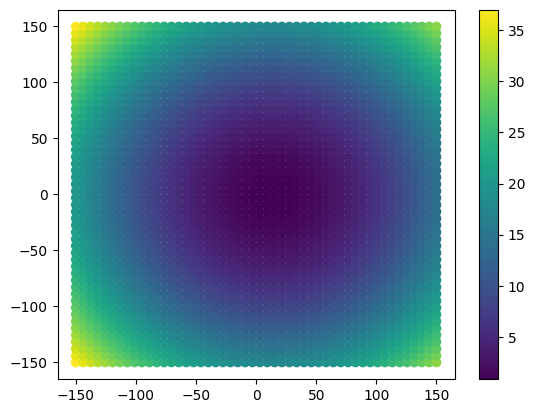

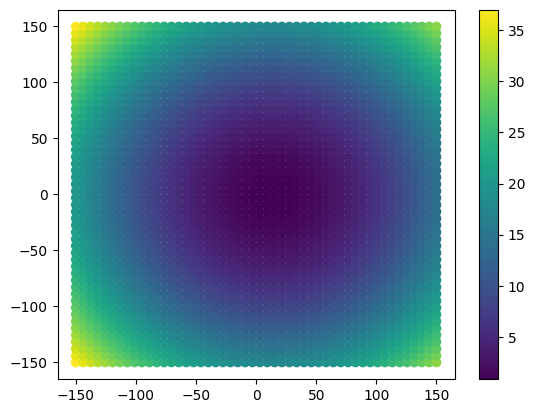

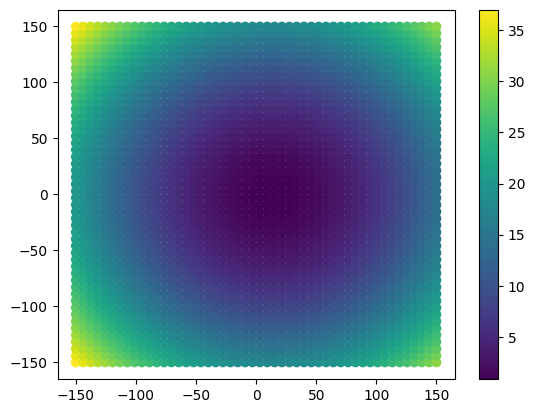

<Figure size 640x480 with 0 Axes>

In [16]:
for h in range(3):
    cbar = []
    for elem in grid:
        cbar.append(miner.morpher.reduced_sigma_morphing(elem))
    
    plt.scatter(np.asarray(grid[:,0]),np.asarray(grid[:,1]),c=cbar)
    plt.colorbar()
    plt.scatter(grid[np.argmin(cbar)][0],grid[np.argmin(cbar)][1],s=100,marker="*",label=np.min(cbar))
    plt.show()
    plt.clf()   